### SSH data from redmar-CICESE stations 2015

http://redmar.cicese.mx

Useful stations are:

|Code|Station|Lat|Lon|
|:--:|:--:|:--:|:-:|
|ENSM|Ensenada| 31°50.894'N | 116°37.067'W|
|SNQN|San Quintín|30°29'4.23"N | 115°58'38.95"W|
|ICDN|Isla de Cedros|28°5.760'N|115°10.992'W|
|GROM|Guerrero Negro|27° 53' N |114° 09' W|
|LPAZ|La Paz|24° 10' N|110° 21' W|

![](figures/estaciones_redmar.png)

### Metadata

Centro de Investigacion Cientifica y de Educacion Superior de Ensenada
   
                  Laboaratorio del Nivel del Mar
                    Red Mareografica de CICESE
   
                       FORMATO DE DATOS
        Estaciones Mareograficas Meteorologicas Costeras (EMMC)
   
                       Zona de tiempo: GMT

|Col|  Variable          |       Unidades | Equipo|
|:--:|:--:|:--:|:--:|
|1  |  Anio   |                   -||
|2  |  Mes    |                  -||
|3  |  Dia    |                  -||
|4  |  Hora   |                  -||
|5  |  Minuto |                  -||
|6  |  Segundo |                 -||
|7  |  ID Estacion |             -||
|8  |  Voltaje sistema   |       V |         datalogger+sensores+radios|
|9  |  Nivel del mar |           m  |        sensor de presion sumergido Leveltrol 700|
|10 |  Nivel del mar |           m  |        sensor de presion burbujeador OTT-CBS|
|11 |  Switch1   |               -  |        switch de flotador superior|
|12 |  Switch2   |               -  |        switch de flotador inferior|
|13 |  Temperatura Agua  |       grados(C)|  sensor de temperatura 109SS-L|
|14 |  Nivel del mar   |         m        |  radar OTT-RSL|
|15 |  Radiacion Solar |         W/m^2    |  piranometro SP-212 ( no funcionando actualmente)|
|16 |  Direccion Viento |        Azimut   |  Vaisala WXT520|
|17 |  Magnitud Viento |         m/s      |  Vaisala WXT520|
|18 |  Temperatura Aire |        grados(C)|  Vaisala WXT520|
|19 |  Humedad Relativa  |       %        | Vaisala WXT520|
|20 |  Presion Atmosferica |     mb      |   Vaisala WXT520|
|21 |  Precipitacion  |          mm      |   Vaisala WXT520|
|22 |  Voltaje estac. meteor. |  V       |   Vaisala WXT520|
|23 |  Nivel del Mar       |     m       |   radar Sutron R|

Nota: Texto escrito sin acentos


<<Reactivacion del Sensor de Temperatura del Mar el día 3/Dic/2018>>

In [1]:
import cmocean as cmo
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy import signal

import ssh_tools as ssht # my module

In [3]:
col_names = ['year','month', 'day', 'hour','minute','second','ID',
                'voltage','ssh_leveltrol','ssh_burbujeador',
                'switch1','switch2', 'water_temp','ssh_radar',
                'solar_radiation','wind_dir','wind_speed',
                'air_temp','rel_humidity','atm_pressure', 'precipitation', 
                'voltage_station', 'ssh_radar_sutron']


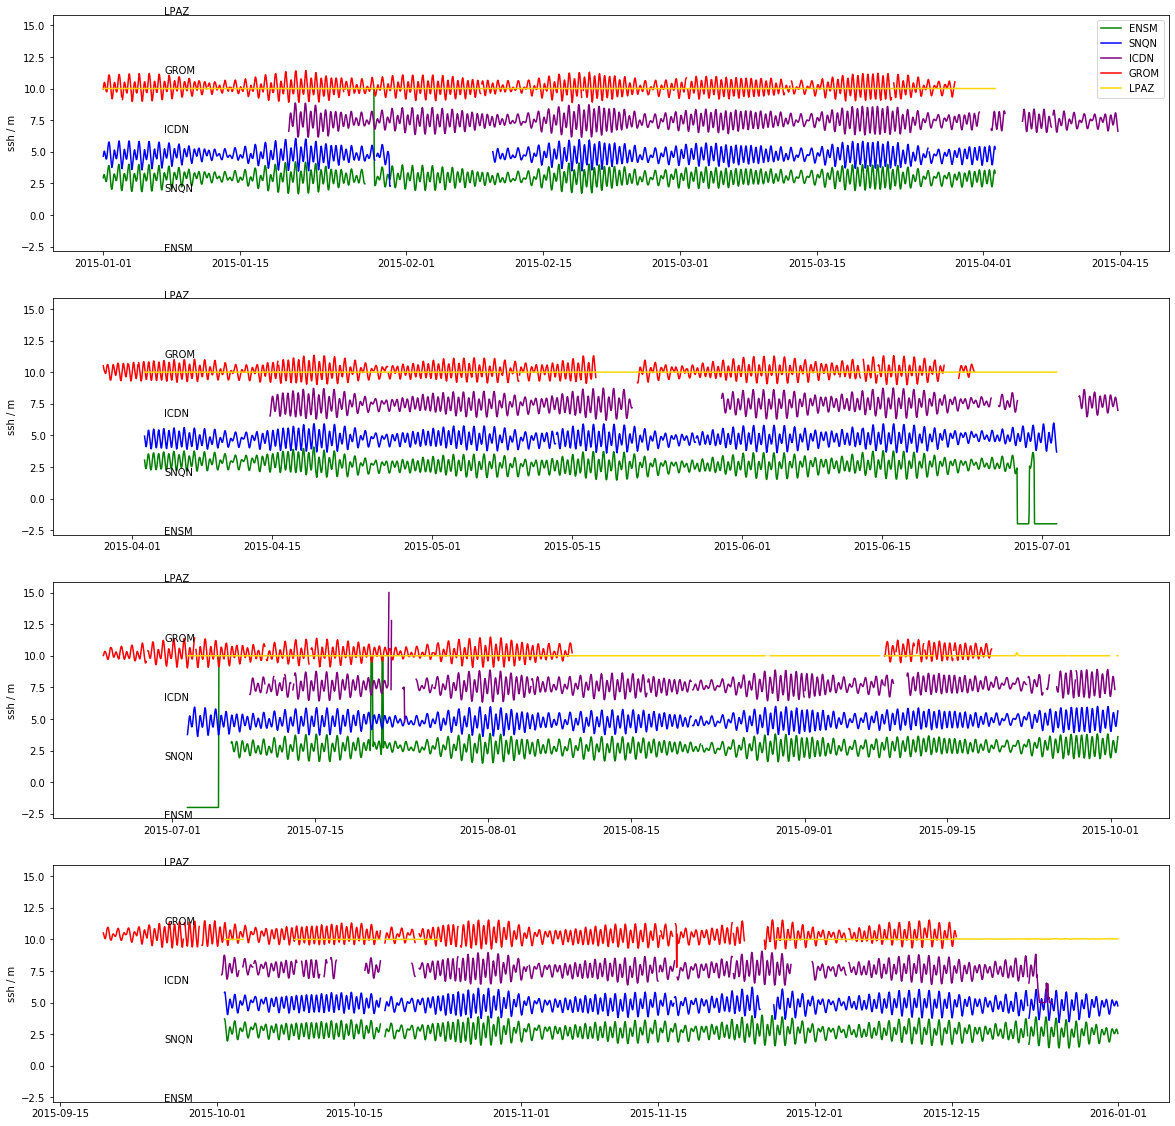

In [44]:
stations = ['ENSM','SNQN','ICDN', 'GROM','LPAZ']
colors = ['green','blue','purple','red','gold']
ii = 0
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(20,20), sharey=True)

for station, col in zip(stations, colors):
    directory = '../REDMAR/'+station+'/2015/'
    offset = 2.5*ii
    df = pd.DataFrame(columns = col_names)   
    for file in sorted([fname for fname in os.listdir(directory) if fname.endswith('.dat')]):
        filename = directory+file
        df_new = ssht.get_redmar_dataframe(filename)  
        df = df.append(df_new)
        continue
    #downsample to 1H to apply doodson filter
    df1 = df['ssh_burbujeador'].resample('1H').mean() 
     
    npts = int(len(df1.index)/4)
    ax1.plot(df1.index[:npts], df1[:npts]+offset, color=col, label=station)
    ax2.plot(df1.index[npts:2*npts], df1[npts:2*npts]+offset, color=col)
    ax3.plot(df1.index[2*npts:3*npts], df1[2*npts:3*npts]+offset, color=col)
    ax4.plot(df1.index[3*npts:4*npts], df1[3*npts:4*npts]+offset, color=col)
       
    ii=ii+1

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xlabel('')
    ax.set_ylabel('ssh / m')
ax1.legend()
ax1.set_title('2015')

ENSM done
SNQN done
ICDN done
GROM done


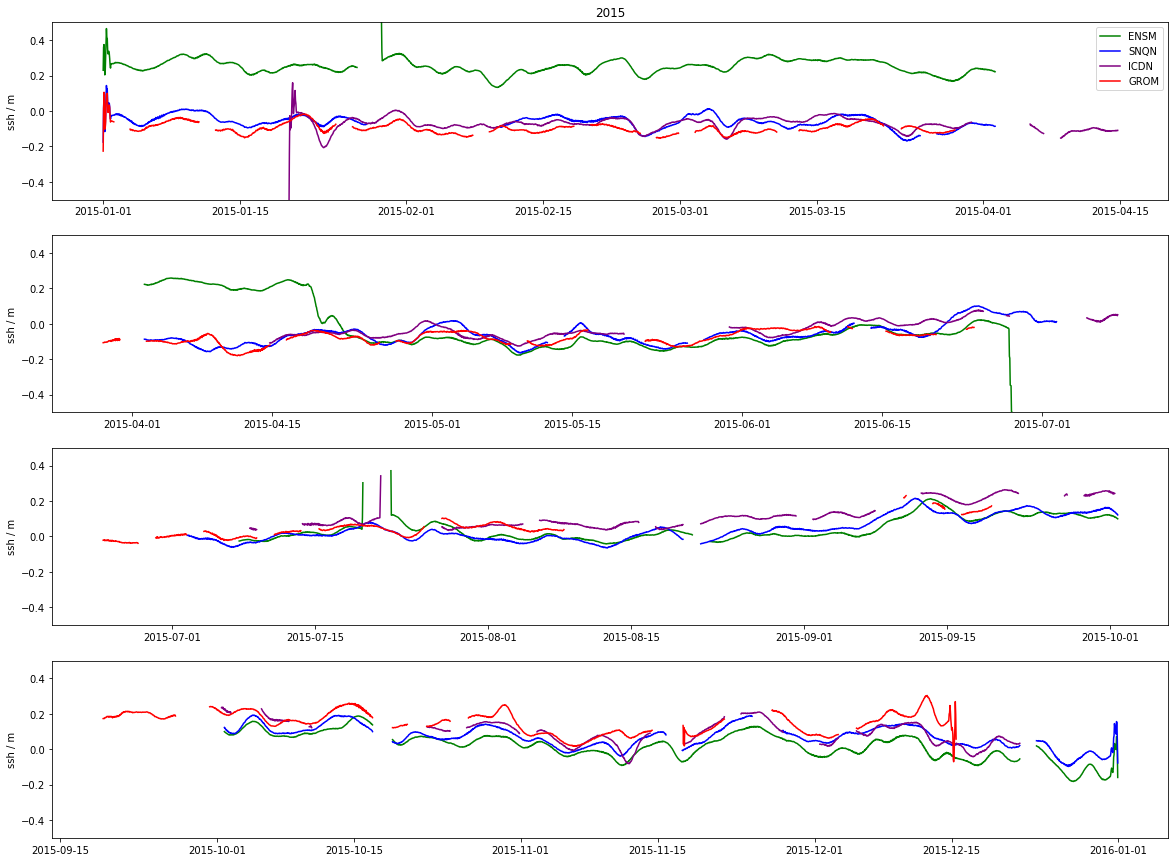

In [59]:
stations = ['ENSM','SNQN','ICDN', 'GROM']
colors = ['green','blue','purple','red','gold']
ii = 0
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(20,15), sharey=True)

for station, col in zip(stations, colors):
    directory = '../REDMAR/'+station+'/2015/'
    offset = 0#2.5*ii
    df = pd.DataFrame(columns = col_names)   
    for file in sorted([fname for fname in os.listdir(directory) if fname.endswith('.dat')]):
        filename = directory+file
        df_new = ssht.get_redmar_dataframe(filename)  
        df = df.append(df_new)
        continue
    #downsample to 1H to apply doodson filter
    df1 = df['ssh_burbujeador'].resample('1H').mean() 
    filt_tides = ssht.filter_timeseries(df1.values, 
                                      winlen=39, method='doodson')
    mean = np.nanmean(filt_tides) 
    filtered = filt_tides-mean
    
    npts = int(len(df1.index)/4)
    ax1.plot(df1.index[:npts], filtered[:npts]+offset, color=col, label=station)
    ax2.plot(df1.index[npts:2*npts], filtered[npts:2*npts]+offset, color=col)
    ax3.plot(df1.index[2*npts:3*npts], filtered[2*npts:3*npts]+offset, color=col)
    ax4.plot(df1.index[3*npts:4*npts], filtered[3*npts:4*npts]+offset, color=col)
       
    #ii = ii+1
    print(station+ ' done')
ax1.legend()
ax1.set_title('2015')
for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xlabel('')
    ax.set_ylabel('ssh / m')
    ax.set_ylim(-0.5,0.5)

### Frequency spectrum

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide
/Users/Karina/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


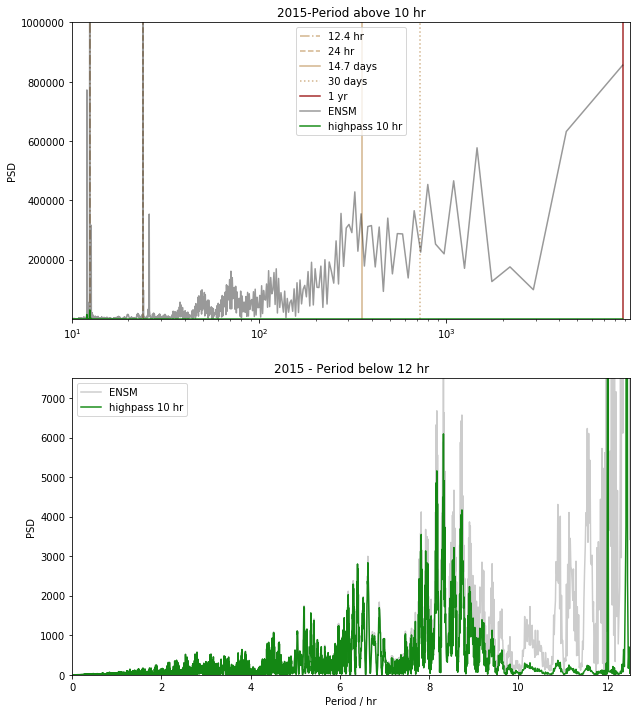

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide
/Users/Karina/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


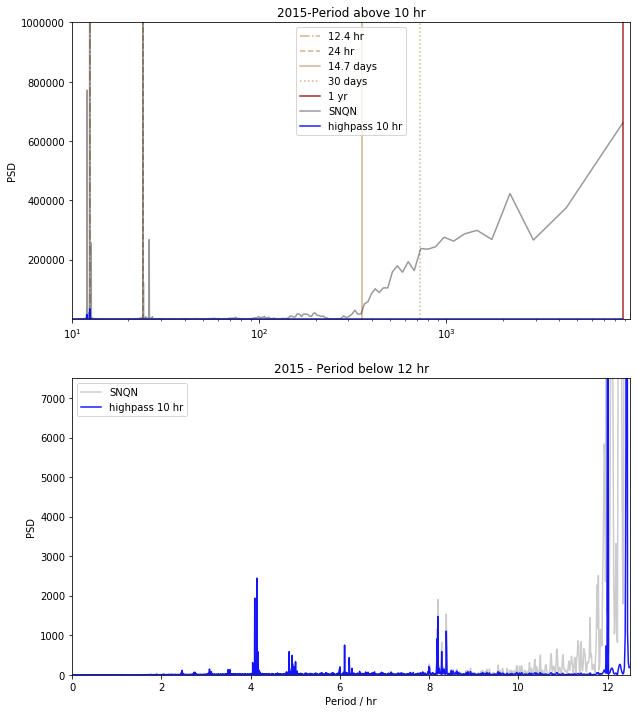

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide
/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide
/Users/Karina/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


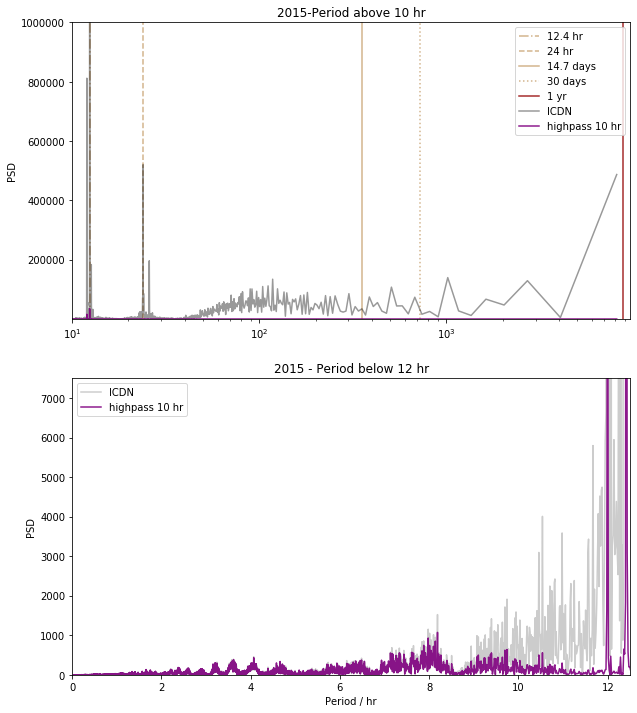

ValueError: cannot reindex a non-unique index with a method or limit

In [115]:
stations = ['ENSM','SNQN','ICDN', 'GROM','LPAZ']
colors = ['green','blue','purple','red','gold']
ii = 0

for station, col in zip(stations, colors):
    directory = '../REDMAR/'+station+'/2015/'
    offset = 2.5*ii
    df = pd.DataFrame(columns = col_names)   
    for file in sorted([fname for fname in os.listdir(directory) if fname.endswith('.dat')]):
        filename = directory+file
        df_new = ssht.get_redmar_dataframe(filename)  
        df = df.append(df_new)
        continue
    #make sure I have 1 sample per minute and remove NaNs
    df1 = df['ssh_burbujeador'].resample('1T').ffill()   
    mean = np.nanmean(df1.values)
    samp_freq = 1/60. # Hz
    
    # Filter 12.42 hour tides 
    highcut = 1/(10.0*3600) # Hz (peak in freq for full time series)
    filtered = ssht.butter_highpass_filter(df1.values-mean, highcut, samp_freq, order=5)

    freq_per, P_den = signal.periodogram(filtered, samp_freq, detrend='constant')
    freq_per2, P_den2 = signal.periodogram(df1.values-mean, samp_freq, detrend='constant')

    # PLOT
    fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,12))
    ax1.axvline(12.4, label='12.4 hr',color='tan',linestyle='-.')
    ax1.axvline(24, label='24 hr',color='tan',linestyle='--')
    ax1.axvline(14.7*24, label='14.7 days',color='tan',linestyle='-')
    ax1.axvline(30*24, label='30 days',color='tan',linestyle=':')
    ax1.axvline(365*24, label='1 yr',color='brown',linestyle='-')

    ax1.plot(1/freq_per2/3600, P_den2, color='k', alpha=0.4, label=station)
    ax1.plot(1/freq_per/3600, P_den, color=col, alpha=0.9, label='highpass 10 hr')

    ax1.set_xscale('log')
    ax1.set_ylim(0.01,1000e3)
    ax1.set_xlim(10,400*24)
    ax1.set_title('2015-Period above 10 hr')
    ax1.set_ylabel('PSD')
    ax1.legend()

    ax2.plot(1/(freq_per2)/3600, P_den2, color='k', alpha=0.2, label=station)
    ax2.plot(1/(freq_per)/3600, P_den, color=col, alpha=0.9, label='highpass 10 hr')
    ax2.set_ylim(0,7.5e3)
    ax2.set_xlim(0,12.5)
    ax2.set_title('2015 - Period below 12 hr')
    ax2.set_xlabel('Period / hr')
    ax2.legend()
    ax2.set_ylabel('PSD')
    plt.show()
    
    ii=ii+1

